## Overview

In this article we will be dicussing about the face detection process using the **Dlib HOG detection** algorithm though in this article we will not only testing the frontal face but also different angles of the image and see where our model will perform well and where not along with that we will be computing the total time taken by the **HOG detector model** to detect the faces in the image.

## Application of face detection

1. **Security purpose**: As face recognition is turning out to be the most common method to maintain the security of the individual/organisation.
2. **Ride shairing companies**: It will help them to check whether the right person was picked by driver or not.
3. **Home automation**: To maintain the security espcially in a home which is driven by technology face detection and recoginition is essential.

###  Import the Libraries

We will first import the required libraries.

In [1]:
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

## Dlib HoG Face Detection

If we want to know about the HOG face detection then first let's breakdown the term which is **Histogram of oriented gradients** which is not only a face detection algorithm but also a complete object detection method in general. HOG is basically a feature descriptor which is performed both for image processing and computer vision techniques.

HOG uses mainly 5 filters during the preprocessing step they are as follows:

1. Frontal face
2. Right side turned face
3. Left side turned face
4. Frontal face but rotated right
5. Frontal face but rotated left

## Loading the HOG face detector

We have by far understood what is HOG face detector but to use it we have to first load the face detector i.e. dlib.get_frontal_face_detector() function which is a pre-trained method and this function has the dlib library beforehand so we dont even need to include the main model file.

In [2]:
# Get the HoG face detection model.
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

## HoG Face Detection Function

So now it's time to create a HOG Face detection function which will be very much realiable in the long run as for the testing purpose we will be using different types of head/face position so for that time we won't be required to perform the same task again and again.


**Syntax of our function**
* **results = hog_face_detector(sample_image, up_sample)**

**Parameters of the function**
* **image**: This parameter will hold the sample image on which we need to perform the face detection.
* **upsample**: This parameter is the optional one and it will be responsible to upsample the input image before executing the face detecion.

**What will this function returns?**

* **results**: The result will be in the format of the array data structure which will be holding the co-ordinates of the bounding boxes of the detected face/faces.

**When we need to upsample the image?**
* As this HOG algorithm is trained with a purpose to detect the face size of atleast 8x80 so whenever we think of detecting the face smaller than that we need to upsample the image which will increase the resolution of image.

In [3]:
def hogDetectFaces(image, hog_face_detector, display = True):

    height, width, _ = image.shape

    output_image = image.copy()

    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    start = time()

    results = hog_face_detector(imgRGB, 0)
    
    end = time()

    for bbox in results:

        x1 = bbox.left()

        y1 = bbox.top()

        x2 = bbox.right()
      
        y2 = bbox.bottom()

        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)  

    if display:

        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)
        
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');

    else:

        return output_image, results              

Code breakdown

1. At the very first step we will be getting the **height and width** of the image using the **shape** function.
2. Creating a copy of the image so that we could perform all the task on the copy image rather than on original image.
3. Then we have converted our sample image from **BGR to RGB** format.
4. As in this article we are calculating the time taken for detection by the algorithm so for that we accessed the current time.
5. Now we will be using the **hog_face_detector** to perform the face detection.
6. Along with the start time we will also retrieve the **end time**.
7. Now we will loop through the bounding boxes and retrieve the **(X1,Y1) and (X2,Y2)** cordinate of the bounding box then based on these coordinate we will draw the bounding boxes.
8. Here comes a slight **validation** part where we will check whether we will display the input and resultant image or not.
9. If yes, we will give the **exact time** that our algorithm took to perform the face detection and then display both the images.
10. Else, we will simply give the **results and the output image**.

As we have created our face detection function i.e **hogDetectFaces** so let's utilise it now to detect the faces using HOG algorithm.

## Reading the sample image for frontal face detection

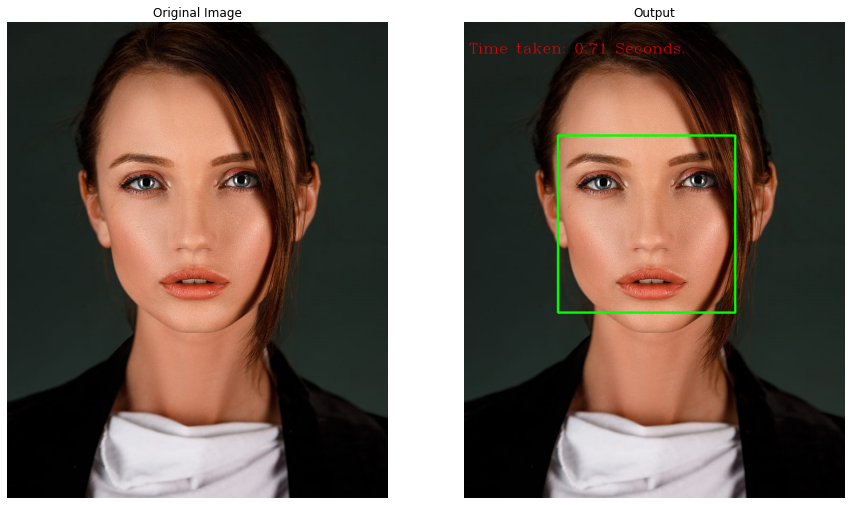

In [4]:
image = cv2.imread('media/1.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

https://w0.peakpx.com/wallpaper/994/28/HD-wallpaper-alexey-polskiy-women-model-face-portrait-frontal-view.jpg

In the above image you can see that our model have perfectly detected the face in 0.71 seconds which shows that along with being accurate it is faster as well. 

## Reading image to detect multiple faces

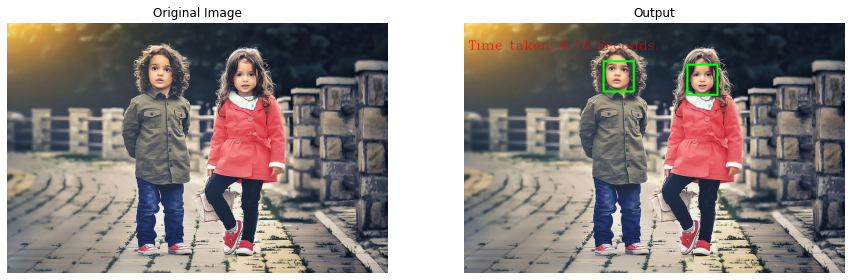

In [6]:
image = cv2.imread('media/2.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

https://c0.wallpaperflare.com/preview/700/308/964/adorable-baby-beautiful-boy.jpg

In the above output we can see that our model have predicted and drawn the bounding boxes on the image accurately and efficiently.

## Reading tilted face sample image

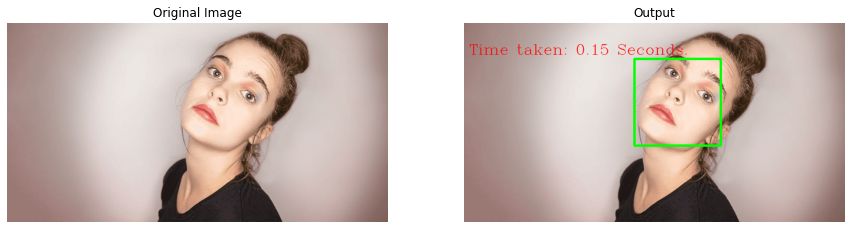

In [7]:
image = cv2.imread('media/3.png')
hogDetectFaces(image, hog_face_detector, display=True)

https://www.prorehabchiro.com/wp-content/uploads/2021/11/Head-Tilt-and-Headaches.png

So from the above output we can conclude that the HOG face detection model not only detect the frontal face but tilted face as well with ease and efficiency and that too pretty fast.

## Reading image which have face size<80x80

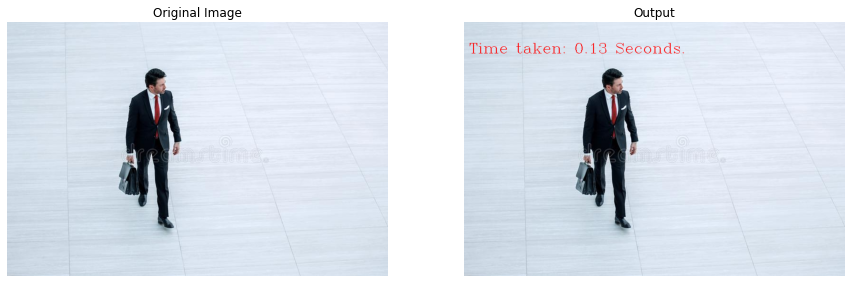

In [8]:
image = cv2.imread('media/4.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

https://thumbs.dreamstime.com/b/far-away-business-man-leather-briefcase-coming-photo-copy-space-129588642.jpg

As in the introduction part of the **HOG face detector** that it will not be able to detect the faces which are smaller than 80x80 size. But if we still want to detect those faces then we have to **upscale** the image using the **upsample** argument of the **HOG face detector** which is there in **hogDetectFaces()** though the computing time will also increase after this process.

## Takeaways from the article

1. The very first takeaway from this article is that we have learnt altogethere different algorithm/method to do the face detection i.e. **HOG face detection**.
2. Then we have also tested our model with variety of images and draw the insight from it regarding how well it performed.
3. Along with the accuracy of detection we also learnt how to keep a track of fast processing of detection.